In [ ]:
 pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D,MultiHeadAttention,LayerNormalization, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Add

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fo = '/content/drive/MyDrive/Digit'

In [ ]:
sizearr = []
X = np.zeros((230,14,1280))
Y = np.zeros((230,))
ctr = 0
for fi in os.listdir(fo):
    data = mne.io.read_raw_edf(os.path.join(fo,fi))
    raw_data = data[2:16][0]*1000
    raw_data = raw_data[:,0:1280]
    #a = raw_data.shape

    _,cls = fi.split('_')
    Y[ctr] = int(cls[0])
    X[ctr,:,:] = raw_data
    ctr = ctr+1

    #sizearr.append(a[1])

Extracting EDF parameters from /content/drive/MyDrive/Digit/name0_9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Digit/name0_3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Digit/name0_4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Digit/name10_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Digit/name0_6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/Digit/name0_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDri

In [ ]:
X_new = np.zeros((36110,32,14))
Y_new = np.zeros((36110,))
npt = 32
stride = 8
ctr = 0
for i in range(0,230):
    y = Y[i]
    a= X[i,:,:]
    a = a.transpose()
    val = 0
    while val<=(len(a)-npt):
        x = a[val:val+npt,:]
        X_new[ctr,:,:] = x
        Y_new[ctr] = y
        val = val+stride
        ctr = ctr+1

In [ ]:
def positional_encoding(inputs):
    pos = tf.range(start=0, limit=tf.shape(inputs)[1], delta=1, dtype=tf.float32)
    pos = tf.expand_dims(pos, axis=-1)  # Expand to match shape
    encoded = inputs + tf.cast(pos, tf.float32) / 1000.0  # Small scaling factor
    return encoded

In [ ]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Epoch 1/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.1232 - loss: 2.3030 - val_accuracy: 0.0969 - val_loss: 2.3327
Epoch 2/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1696 - loss: 2.2292 - val_accuracy: 0.1090 - val_loss: 2.4591
Epoch 3/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2146 - loss: 2.1467 - val_accuracy: 0.1627 - val_loss: 2.2396
Epoch 4/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2462 - loss: 2.0643 - val_accuracy: 0.2471 - val_loss: 2.0727
Epoch 5/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2923 - loss: 1.9736 - val_accuracy: 0.3221 - val_loss: 1.9305
Epoch 6/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3298 - loss: 1.8892 - val_accuracy: 0.3690 - val_loss: 1.8069
Epoch 7/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3579 - loss: 1.8107 - val_accuracy: 0.3979 - val_loss: 1.7102
Epoch 8/1000
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3977 - loss: 1.718

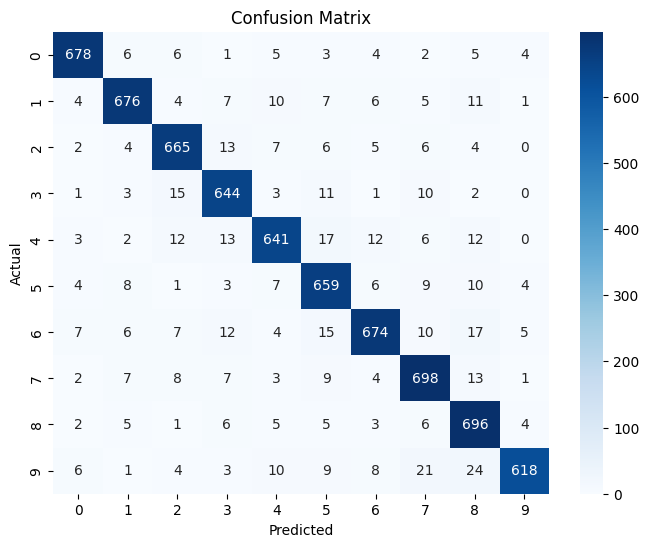

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       714
         1.0       0.94      0.92      0.93       731
         2.0       0.92      0.93      0.93       712
         3.0       0.91      0.93      0.92       690
         4.0       0.92      0.89      0.91       718
         5.0       0.89      0.93      0.91       711
         6.0       0.93      0.89      0.91       757
         7.0       0.90      0.93      0.92       752
         8.0       0.88      0.95      0.91       733
         9.0       0.97      0.88      0.92       704

    accuracy                           0.92      7222
   macro avg       0.92      0.92      0.92      7222
weighted avg       0.92      0.92      0.92      7222



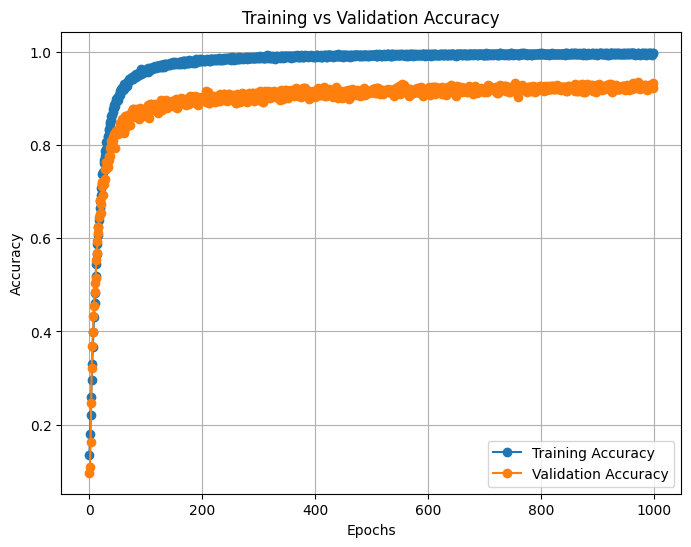

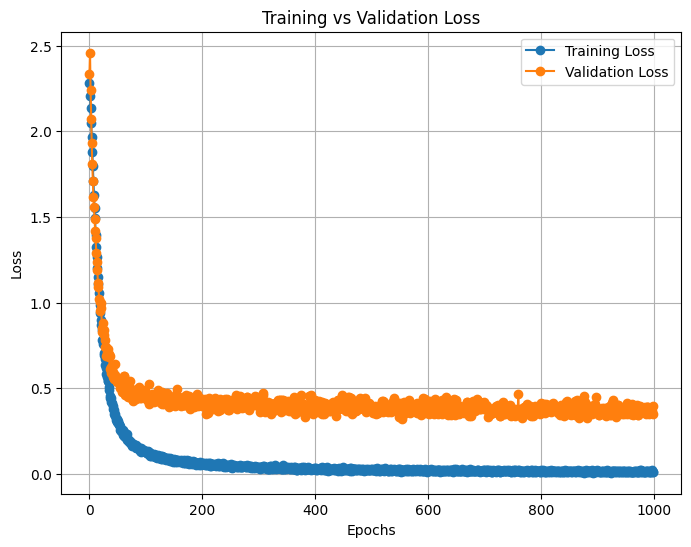

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=1)

# Model Definition
i1 = Input(shape=(32, 14))
x1 = BatchNormalization()(i1)

# Improved CNN Feature Extractor
x1 = Conv1D(256, kernel_size=5, activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(2)(x1)

x1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
x1 = BatchNormalization()(x1)

# Add Positional Encoding
x1 = Lambda(lambda x: positional_encoding(x), output_shape=lambda s: s)(x1)

# Multi-Head Self-Attention with FeedForward Network
attn_output = MultiHeadAttention(num_heads=8, key_dim=64)(x1, x1)
attn_output = LayerNormalization()(attn_output)

# Residual Connection
x1 = Add()([attn_output, Conv1D(128, kernel_size=1, activation='relu', padding='same')(x1)])

# FeedForward Network (FFN)
x1 = Dense(256, activation='relu')(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = GlobalAveragePooling1D()(x1)

# Fully Connected Layers
x1 = Dense(256, activation='relu')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.3)(x1)

output = Dense(10, activation='softmax')(x1)

# Compile Model
model = Model(inputs=i1, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])

# Train Model
history = model.fit(X_train, to_categorical(Y_train), validation_split=0.2, epochs=1000, batch_size=128, verbose=1)

# Evaluate Model
pred = model.predict(X_test)
Y_pred = np.argmax(pred, axis=1)

# Compute accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Plot Training & Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()
